In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import TextBox
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.patches import Arc

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib widget
plt.ion()

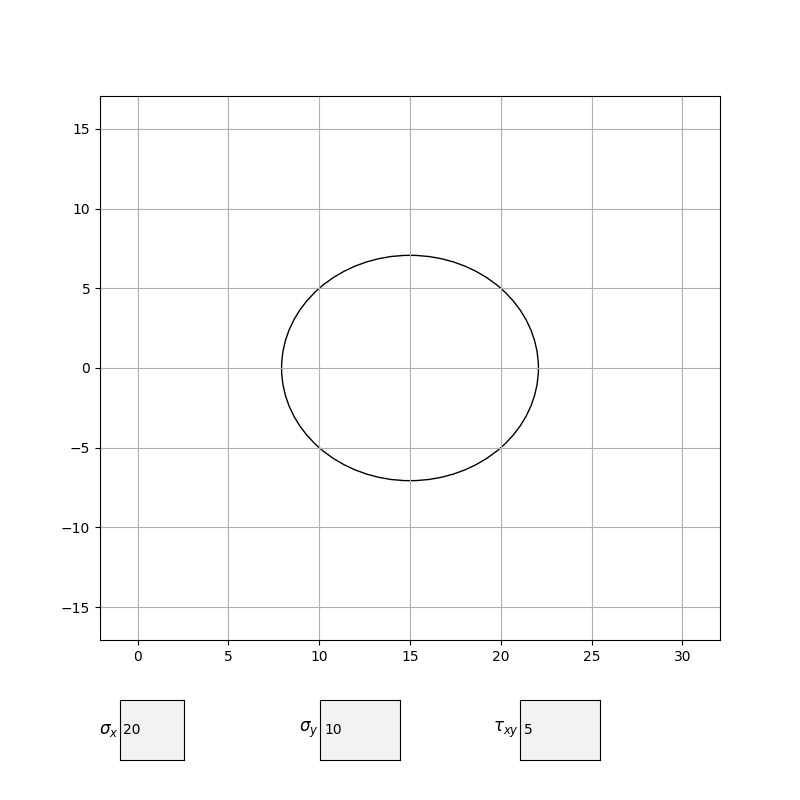

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from matplotlib.widgets import TextBox

# Function to update the Mohr Circle plot when input values change
def update_plot(val):
    # Clear the current plot and set grid and title
    ax.clear()
    ax.grid(True)
    ax.set_title('Mohr Circle')
    
    # Get current input values of σ_x, σ_y, and τ_xy from text boxes
    s_x = float(text_box_1.text)
    s_y = float(text_box_2.text)
    t_xy = float(text_box_3.text)
    
    # Calculate center and radius of the Mohr Circle
    center = (s_x + s_y) / 2
    radius = np.sqrt(((s_x - s_y) / 2) ** 2 + t_xy ** 2)

    # Draw the Mohr Circle
    circle = plt.Circle((center, 0), radius, facecolor='cyan', edgecolor='black', fill=True, alpha=1)
    ax.add_artist(circle)

    # Compute principal angle θ_p and shear angle θ_s (halved for Mohr Circle)
    theta_p = np.arctan(2 * t_xy / (s_x - s_y)) / 2
    theta_s = np.pi / 2 - theta_p

    # Convert angles to degrees
    rotated_angle_deg_p = theta_p * 180 / np.pi
    rotated_angle_deg_s = theta_s * 180 / np.pi

    # Calculate coordinates for plotting principal and shear stress lines
    x_input = [
        center - radius * np.cos(theta_p),
        center,
        center + radius * np.cos(theta_p),
        center - radius * np.cos(theta_s),
        center + radius * np.cos(theta_s)
    ]
    y_input = [
        -radius * np.sin(theta_p),
        0,
        radius * np.sin(theta_p),
        -radius * np.sin(theta_s),
        radius * np.sin(theta_s)
    ]

    # Plot stress lines on the Mohr Circle
    ax.plot([x_input[0], x_input[2]], [y_input[0], y_input[2]], linestyle='--', color='red')
    ax.plot([x_input[3], x_input[4]], [y_input[3], y_input[4]], linestyle='--', color='red')
    ax.plot([center - radius, center + radius], [0, 0], linestyle='--', color='black')
    ax.plot([center, center], [-radius, radius], linestyle='--', color='black')

    # Plot the principal angle θ_p and add an arc for visualization
    ax.annotate('', xy=(center + 0.40 * radius * np.cos(theta_p), 0.40 * radius * np.sin(theta_p)), xytext=(center, 0),
                arrowprops=dict(arrowstyle="->", lw=1.5))
    ax.text(center + 0.40 * radius * np.cos(theta_p), 0.40 * radius * np.sin(theta_p) - 0.1 * radius, 
            r'$\theta_p$' + f' = {rotated_angle_deg_p:.1f}' + r'$^\circ$', fontsize=14)
    arc_p = Arc((center, 0), 0.5 * radius, 0.5 * radius, angle=0, theta1=0, theta2=rotated_angle_deg_p, 
                edgecolor='black', linestyle='dashed', linewidth=1.5)
    ax.add_patch(arc_p)

    # Plot the shear angle θ_s and add an arc for visualization
    ax.annotate('', xy=(center + 0.40 * radius * np.cos(theta_s), 0.40 * radius * np.sin(theta_s)), xytext=(center, 0),
                arrowprops=dict(arrowstyle="->", lw=1.5))
    ax.text(center + 0.40 * radius * np.cos(theta_s), 0.40 * radius * np.sin(theta_s) - 0.1 * radius, 
            r'$\theta_s$' + f' = {rotated_angle_deg_s:.1f}' + r'$^\circ$', fontsize=14)
    arc_s = Arc((center, 0), 0.5 * radius, 0.5 * radius, angle=0, theta1=rotated_angle_deg_s, theta2=0, 
                edgecolor='black', linestyle='dashed', linewidth=1.5)
    ax.add_patch(arc_s)

    # Set the limits of the plot based on the circle dimensions
    ax.set_xlim([center - radius - 5, center + radius + 5])
    ax.set_ylim([-radius - 5, radius + 5])

    # Plot points for σ_avg, σ_max, σ_min, τ_max, and τ_min
    x_pt = [center, center + radius, center - radius, center, center]
    y_pt = [0, 0, 0, radius, -radius]
    labels = [r'$\sigma_{avg}$', r'$\sigma_{max}$', r'$\sigma_{min}$', r'$\tau_{max}$', r'$\tau_{min}$']
    for x, y, label in zip(x_pt, y_pt, labels):
        ax.text(x + 0.5, y, label, fontsize=14)
        ax.scatter(x, y, color='red')

    # Final adjustments and plot redraw
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)
    plt.draw()

# Initialize the plot and set up the figure
fig, ax = plt.subplots(figsize=(8, 8))
plt.subplots_adjust(bottom=0.2)

# Initial values for stresses σ_x, σ_y, and τ_xy
s1 = 20
s2 = 10
t1 = 5

# Draw the initial Mohr Circle with these values
center_i = (s1 + s2) / 2
rad_i = np.sqrt(((s1 - s2) ** 2) / 4 + t1 ** 2)
initial_circle = plt.Circle((center_i, 0), rad_i, fill=False)
ax.add_artist(initial_circle)

# Set plot limits and grid for the initial plot
ax.set_xlim([center_i - rad_i - 10, center_i + rad_i + 10])
ax.set_ylim([-rad_i - 10, rad_i + 10])
ax.grid(True)

# Add input text boxes for σ_x, σ_y, and τ_xy
axbox_1 = plt.axes([0.15, 0.05, 0.08, 0.075])
text_box_1 = TextBox(axbox_1, r'$\sigma_x$ ', initial=str(s1))
text_box_1.label.set_fontsize(12)

axbox_2 = plt.axes([0.4, 0.05, 0.1, 0.075])
text_box_2 = TextBox(axbox_2, r'$\sigma_y$ ', initial=str(s2))
text_box_2.label.set_fontsize(12)

axbox_3 = plt.axes([0.65, 0.05, 0.1, 0.075])
text_box_3 = TextBox(axbox_3, r'$\tau_{xy}$', initial=str(t1))
text_box_3.label.set_fontsize(12)

# Bind the text boxes to the update function
text_box_1.on_submit(update_plot)
text_box_2.on_submit(update_plot)
text_box_3.on_submit(update_plot)

# Show the initial plot
plt.show()


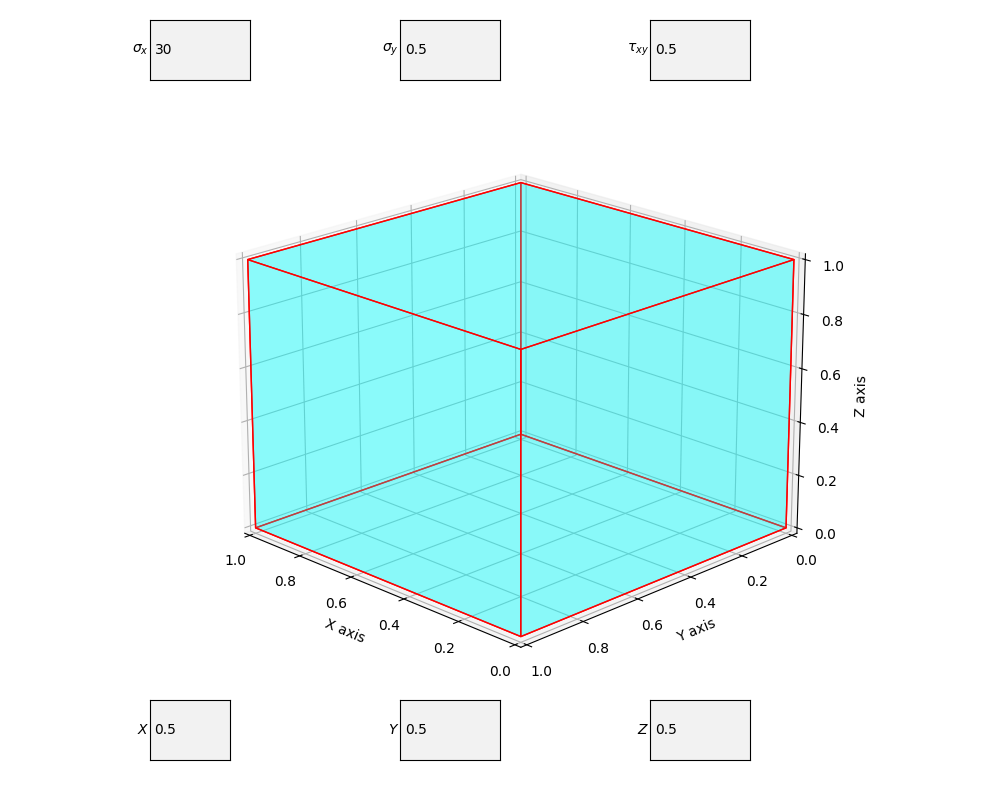

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.widgets import TextBox
import numpy as np

# Initialize figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Function to update the plot when values change
def update(val):
    # Clear the current plot
    ax.clear()

    # Define the vertices of a cube
    cube_vertices = np.array([
        [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
        [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]
    ])

    # Define the faces of the cube using the vertices
    faces = [
        [cube_vertices[j] for j in [0, 1, 2, 3]],  # Bottom face
        [cube_vertices[j] for j in [4, 5, 6, 7]],  # Top face
        [cube_vertices[j] for j in [0, 1, 5, 4]],  # Front face
        [cube_vertices[j] for j in [2, 3, 7, 6]],  # Back face
        [cube_vertices[j] for j in [1, 2, 6, 5]],  # Right face
        [cube_vertices[j] for j in [0, 3, 7, 4]]   # Left face
    ]

    # Plot the cube with a light color and red edges
    ax.add_collection3d(Poly3DCollection(faces, facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.25))

    # Set plot limits and labels
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.view_init(elev=20., azim=135)  # Set initial view angle

    # Get input values for σ_x, σ_y, and τ_xy
    sigma_x = float(text_box_5.text)
    sigma_y = float(text_box_6.text)
    tau_xy = float(text_box_7.text)

    # Calculate the rotation angle (Mohr Circle approximation)
    rotation_angle = np.arctan(np.divide(2 * tau_xy, (sigma_x - sigma_y))) / 2

    # Define the normal vector for the rotated plane
    theta = rotation_angle
    normal = np.array([-np.sin(theta), np.cos(theta), 1])

    # Get input for the point coordinates (X, Y, Z)
    input_point = (float(text_box_1.text), float(text_box_2.text), float(text_box_3.text))

    # Create meshgrid for the plane
    xx, yy = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))

    # Define the plane equation and calculate z-coordinates for the plane
    d = normal[0] * input_point[0] + normal[1] * input_point[1] + normal[2] * input_point[2]
    zz = (-normal[0] * xx - normal[1] * yy + d) / normal[2]

    # Plot the rotated plane with a semi-transparent green color
    ax.plot_surface(xx, yy, zz, color='green', alpha=0.5)

    # Plot the input point on the 3D plot
    ax.scatter3D(input_point[0], input_point[1], input_point[2], color='red', s=100, zorder=4, alpha=1)
    ax.text3D(input_point[0] + 0.05, input_point[1] + 0.05, input_point[2] + 0.05, 'Point', fontsize=14)

    # Redraw the updated plot
    plt.draw()

# Define the vertices of a cube
cube_vertices = np.array([
    [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
    [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]
])

# Define the faces of the cube
faces = [
    [cube_vertices[j] for j in [0, 1, 2, 3]],  # Bottom face
    [cube_vertices[j] for j in [4, 5, 6, 7]],  # Top face
    [cube_vertices[j] for j in [0, 1, 5, 4]],  # Front face
    [cube_vertices[j] for j in [2, 3, 7, 6]],  # Back face
    [cube_vertices[j] for j in [1, 2, 6, 5]],  # Right face
    [cube_vertices[j] for j in [0, 3, 7, 4]]   # Left face
]

# Plot the initial cube
ax.add_collection3d(Poly3DCollection(faces, facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.25))

# Set the initial plot limits and labels
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.view_init(elev=20., azim=135)

# Create text boxes for input (X, Y, Z coordinates)
axbox_1 = plt.axes([0.15, 0.05, 0.08, 0.075])
text_box_1 = TextBox(axbox_1, r'$X$', initial=str(0.5))

axbox_2 = plt.axes([0.4, 0.05, 0.1, 0.075])
text_box_2 = TextBox(axbox_2, r'$Y$', initial=str(0.5))

axbox_3 = plt.axes([0.65, 0.05, 0.1, 0.075])
text_box_3 = TextBox(axbox_3, r'$Z$', initial=str(0.5))

# Create text boxes for σ_x, σ_y, and τ_xy values
axbox_5 = plt.axes([0.15, 0.9, 0.1, 0.075])
text_box_5 = TextBox(axbox_5, r'$\sigma_x$', initial=str(30))

axbox_6 = plt.axes([0.4, 0.9, 0.1, 0.075])
text_box_6 = TextBox(axbox_6, r'$\sigma_y$', initial=str(0.5))

axbox_7 = plt.axes([0.65, 0.9, 0.1, 0.075])
text_box_7 = TextBox(axbox_7, r'$\tau_{xy}$', initial=str(0.5))

# Bind the text box inputs to the update function
text_box_3.on_submit(update)

# Display the plot
plt.show()


0

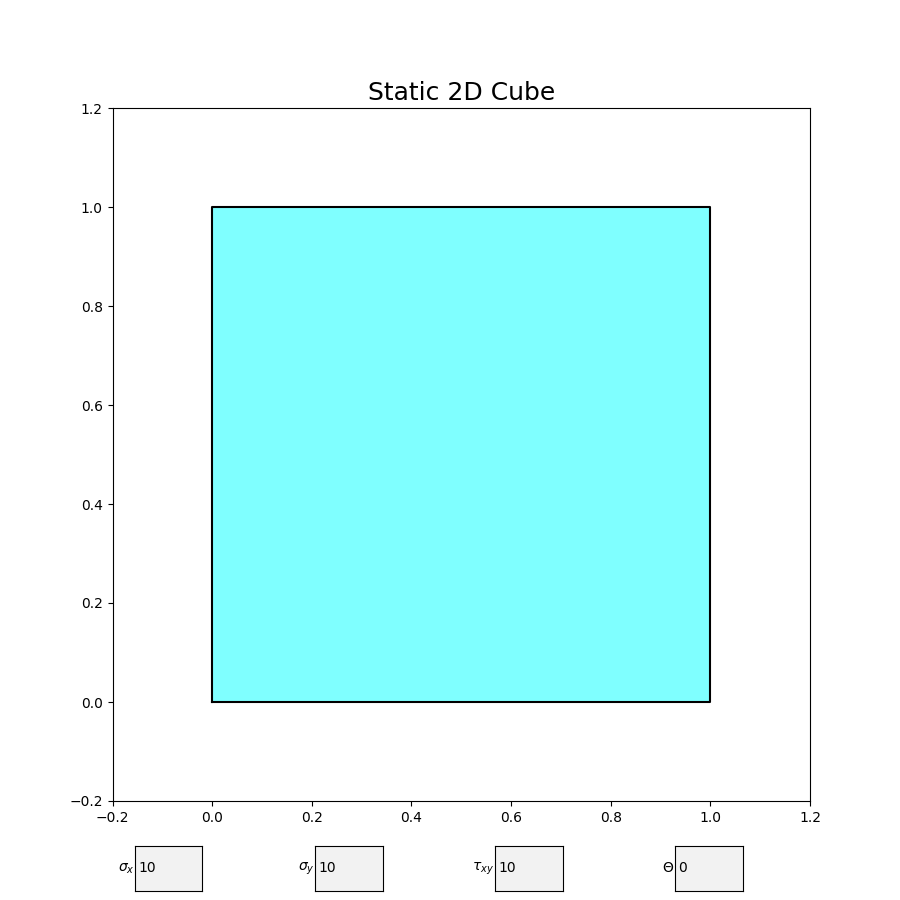

TypeError: Axes3D.text() missing 1 required positional argument: 's'

In [17]:
import matplotlib.pyplot as plt
from math import cos, sin, sqrt, atan2, pi
from matplotlib.patches import Arc


fig, ax=plt.subplots(figsize=(9,9))

def stress_transformation(sigma_x, sigma_y, tau_xy, theta):

    # Calculate transformed stresses
    sigma_x_prime = sigma_x * cos(theta)**2 + sigma_y * sin(theta)**2 + 2 * tau_xy * sin(theta) * cos(theta)
    sigma_y_prime = sigma_x * sin(theta)**2 + sigma_y * cos(theta)**2 - 2 * tau_xy * sin(theta) * cos(theta)
    tau_xy_prime = (sigma_y - sigma_x) * sin(2 * theta) / 2 + tau_xy * cos(2 * theta)

    # Calculate maximum stresses
    max_sigma_1 = (sigma_x_prime + sigma_y_prime) / 2 + sqrt(((sigma_x_prime - sigma_y_prime) / 2)**2 + tau_xy_prime**2)
    max_sigma_2 = (sigma_x_prime + sigma_y_prime) / 2 - sqrt(((sigma_x_prime - sigma_y_prime) / 2)**2 + tau_xy_prime**2)

    # Calculate maximum shear stress
    max_tau = abs(tau_xy_prime)

    return sigma_x_prime, sigma_y_prime, tau_xy_prime

def plot_rotated_cube(val):

    ax.clear()

    sigma_x=float(text_box_1.text)
    sigma_y=float(text_box_2.text)
    tau_xy=float(text_box_3.text)
    theta=float(text_box_4.text)*np.pi/180

    # plt.clear()
    # Calculate maximum stresses and strains
    new_sigma_x, new_sigma_y, new_tau_xy = stress_transformation(sigma_x, sigma_y, tau_xy, theta)

    # Draw the rotated 2D cube on coordinate axes
    # plt.figure(figsize=(8, 8))

    # Rotated cube
    rotated_x_1 = 0
    rotated_y_1 = 0
    rotated_x_2 = cos(theta)
    rotated_y_2 = sin(theta)
    rotated_x_3 = np.sqrt(2)*cos(theta + np.pi/4)
    rotated_y_3 = np.sqrt(2)*sin(theta+np.pi/4)
    rotated_x_4 = -sin(theta)
    rotated_y_4 = cos(theta)
    # plt.scatter(rotated_x_2,rotated_y_2)
    ax.plot([rotated_x_1, rotated_x_2, rotated_x_3, rotated_x_4, rotated_x_1], 
             [rotated_y_1, rotated_y_2, rotated_y_3, rotated_y_4, rotated_y_1], 'black', label='Rotated cube')


    square_x = [rotated_x_1, rotated_x_2, rotated_x_3, rotated_x_4]
    square_y = [rotated_y_1, rotated_y_2, rotated_y_3, rotated_y_4]

    # Add face color to the square
    ax.fill(square_x, square_y, 'cyan', alpha=0.5)
    # Add an arrowhead to the arc
    ax.annotate('', xy=(0.25*cos(theta), 0.25*sin(theta)), xytext=(0, 0),
                 arrowprops=dict(arrowstyle="->", lw=1.5))

    # Display the rotation angle in degrees
    rotated_angle_deg = (theta * 180 / pi) % 360  # Adjusting the angle to be within 0-360 degrees


    
    arc = Arc((0, 0), 0.5, 0.5, angle=0, theta1=0, theta2=rotated_angle_deg, edgecolor='black', linestyle='dashed', linewidth=1.5)
    ax.add_patch(arc)


    ax.annotate('', xy=((rotated_x_2+rotated_x_3)/2 + 0.25*cos(theta),(rotated_y_2+rotated_y_3)/2+0.25*sin(theta)), xytext=((rotated_x_2+rotated_x_3)/2, (rotated_y_2+rotated_y_3)/2),
                 arrowprops=dict(arrowstyle="->", lw=1.5))
    ax.text((rotated_x_2+rotated_x_3)/2 + 0.25,(rotated_y_2+rotated_y_3)/2+0.25, r'$\sigma_{x}$' + f'={new_sigma_x:.2f}', fontsize=14)


    ax.annotate('', xy=((rotated_x_3+rotated_x_4)/2 - 0.25*sin(theta),(rotated_y_3+rotated_y_4)/2+0.25*cos(theta)), xytext=((rotated_x_4+rotated_x_3)/2, (rotated_y_4+rotated_y_3)/2),
                arrowprops=dict(arrowstyle="->", lw=1.5))
    ax.text((rotated_x_4+rotated_x_3)/2 - 0.30,(rotated_y_4+rotated_y_3)/2+0.25, r'$\sigma_{y}$'+f'={new_sigma_y:.2f}', fontsize=14)


    ax.annotate('', xy=((rotated_x_4+rotated_x_1)/2 - 0.25*cos(theta),(rotated_y_4+rotated_y_1)/2-0.25*sin(theta)), xytext=((rotated_x_4+rotated_x_1)/2, (rotated_y_4+rotated_y_1)/2),
                 arrowprops=dict(arrowstyle="->", lw=1.5))
    
    ax.annotate('', xy=((rotated_x_2+rotated_x_1)/2 + 0.25*sin(theta),(rotated_y_2+rotated_y_1)/2-0.25*cos(theta)), xytext=((rotated_x_2+rotated_x_1)/2, (rotated_y_2+rotated_y_1)/2),
                arrowprops=dict(arrowstyle="->", lw=1.5))
    

    ax.annotate('', xy=(rotated_x_1,rotated_y_1-0.05), xytext=(rotated_x_2, rotated_y_2-0.05),
            arrowprops=dict(arrowstyle="->", lw=1.5))
    ax.text(rotated_x_3,rotated_y_3+0.05, r'$\tau_{xy}$'+f'={new_tau_xy:.2f}', fontsize=14)
    
    ax.annotate('', xy=(rotated_x_3,rotated_y_3+0.05), xytext=(rotated_x_2, rotated_y_2+0.05),
        arrowprops=dict(arrowstyle="->", lw=1.5))
    
    ax.annotate('', xytext=(rotated_x_4-0.05,rotated_y_4+0.05), xy=(rotated_x_3-0.05, rotated_y_3+0.05),
        arrowprops=dict(arrowstyle="->", lw=1.5))
    
    ax.annotate('', xy=(rotated_x_1-0.05,rotated_y_1), xytext=(rotated_x_4-0.05, rotated_y_4),
    arrowprops=dict(arrowstyle="->", lw=1.5))

    # Add an arrowhead to the arc
    ax.annotate('', xy=(0.25*cos(theta), 0.25*sin(theta)), xytext=(0, 0),
                 arrowprops=dict(arrowstyle="->", lw=1.5))
    ax.annotate('', xy=(0.25,0), xytext=(0, 0),
                 arrowprops=dict(arrowstyle="->", lw=1.5))
    # plt.text(0, -0.2, f'Rotated Angle: {rotated_angle_deg:.2f} degrees', fontsize=12, ha='center')
    ax.text(0.3,0.1,f'{rotated_angle_deg:.2f}'+r'$^\circ$', fontsize=12, ha='center')

    # Add labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Rotated 2D Cube by {rotated_angle_deg:.1f}'+r'$^\circ$', fontsize=18)
    # ax.legend()

    # plt.tight_layout()
    # ax.set_autoscale_on()
    # ax.set_xlim([-2,1.41])
    # ax.set_ylim([-0.2,1.5])
    # plt.axis('equal')
    ax.margins(0.2)
    plt.draw()


ax.set_title('Static 2D Cube', fontsize=18)

theta=0
rotated_x_1 = 0
rotated_y_1 = 0
rotated_x_2 = cos(theta)
rotated_y_2 = sin(theta)
rotated_x_3 = np.sqrt(2)*cos(theta + np.pi/4)
rotated_y_3 = np.sqrt(2)*sin(theta+np.pi/4)
rotated_x_4 = -sin(theta)
rotated_y_4 = cos(theta)
# plt.tight_layout()
# plt.scatter(rotated_x_2,rotated_y_2)
ax.plot([rotated_x_1, rotated_x_2, rotated_x_3, rotated_x_4, rotated_x_1], 
            [rotated_y_1, rotated_y_2, rotated_y_3, rotated_y_4, rotated_y_1], 'black', label='Rotated cube')

square_x = [rotated_x_1, rotated_x_2, rotated_x_3, rotated_x_4]
square_y = [rotated_y_1, rotated_y_2, rotated_y_3, rotated_y_4]

# Add face color to the square
ax.fill(square_x, square_y, 'cyan', alpha=0.5)

ax.margins(0.2)

axbox_1 = plt.axes([0.15, 0.01, 0.075, 0.05])
text_box_1 = TextBox(axbox_1, r'$\sigma_x$', initial=str(10))


axbox_2 = plt.axes([0.35, 0.01, 0.075, 0.05])
text_box_2 = TextBox(axbox_2, r'$\sigma_y$', initial=str(10))

axbox_3 = plt.axes([0.55, 0.01, 0.075, 0.05])
text_box_3 = TextBox(axbox_3, r'$\tau_{xy}$', initial=str(10))

axbox_4= plt.axes([0.75, 0.01, 0.075, 0.05])
text_box_4=TextBox(axbox_4, r'$\Theta$', initial=str(0))

text_box_4.on_submit(plot_rotated_cube)